In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy import stats
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coviddata/products_info.csv
/kaggle/input/coviddata/districts_info.csv
/kaggle/input/engagement-data/6345.csv
/kaggle/input/engagement-data/9812.csv
/kaggle/input/engagement-data/2339.csv
/kaggle/input/engagement-data/5404.csv
/kaggle/input/engagement-data/5150.csv
/kaggle/input/engagement-data/1624.csv
/kaggle/input/engagement-data/3188.csv
/kaggle/input/engagement-data/7964.csv
/kaggle/input/engagement-data/2165.csv
/kaggle/input/engagement-data/9463.csv
/kaggle/input/engagement-data/9303.csv
/kaggle/input/engagement-data/2321.csv
/kaggle/input/engagement-data/8937.csv
/kaggle/input/engagement-data/1179.csv
/kaggle/input/engagement-data/7352.csv
/kaggle/input/engagement-data/1000.csv
/kaggle/input/engagement-data/6055.csv
/kaggle/input/engagement-data/1142.csv
/kaggle/input/engagement-data/6584.csv
/kaggle/input/engagement-data/9043.csv
/kaggle/input/engagement-data/5231.csv
/kaggle/input/engagement-data/3864.csv
/kaggle/input/engagement-data/1044.csv
/kaggle/input/enga

In [6]:
import pandas as pd
import numpy as np  
import os
import seaborn as sns 
pal = sns.color_palette()
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import wandb
import json
import warnings
import datetime
from PIL import Image
from tqdm import tqdm
from sklearn import preprocessing
import glob
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from IPython.core.display import display, HTML, Javascript
import IPython.display as py_display
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout

#for geospatial analysis
import math
import folium
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Exploratory data analysis

# Loading The Data 

In [8]:
district=pd.read_csv("../input/coviddata/districts_info.csv")

In [9]:

district = pd.read_csv('../input/coviddata/districts_info.csv', index_col=0).dropna(how='all')
district.head()

,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
district_id,,,,,,
8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


# Five top records of data

In [11]:
district.shape


(176, 6)

In [12]:
district.head()

,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
district_id,,,,,,
8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


# Five last records of data

In [13]:
district.tail()

,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
district_id,,,,,,
9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN
7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


# Coloumns/features in data

In [14]:
district.columns

Index(['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
       'county_connections_ratio', 'pp_total_raw'],
      dtype='object')

# Length of data

In [15]:
print('lenght of data is', len(district))

lenght of data is 176


# Data Information

In [16]:
district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 8815 to 7164
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   state                     176 non-null    object
 1   locale                    176 non-null    object
 2   pct_black/hispanic        176 non-null    object
 3   pct_free/reduced          148 non-null    object
 4   county_connections_ratio  162 non-null    object
 5   pp_total_raw              118 non-null    object
dtypes: object(6)
memory usage: 9.6+ KB


# Data types of all coloumns

In [17]:
district.dtypes

state                       object
locale                      object
pct_black/hispanic          object
pct_free/reduced            object
county_connections_ratio    object
pp_total_raw                object
dtype: object

# Checking Null values / missing values

In [18]:
import numpy as np
np.sum(district.isnull().any(axis=1))

88

# Rows and columns in the dataset

In [19]:
print('Count of columns in the data is:  ', len(district.columns))

Count of columns in the data is:   6


In [20]:
print('Count of rows in the data is:  ', len(district))

Count of rows in the data is:   176


# Deleting the duplicate rows

In [21]:
current=len(district)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  176


In [22]:
district=district.drop_duplicates()

In [23]:
now=len(district)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  123


In [24]:
diff=current-now
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  53


In [25]:
district= district[district.state.notna()].reset_index(drop=True)

In [26]:
product = pd.read_csv('../input/coviddata/products_info.csv')
product.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [27]:
product.shape

(372, 6)

In [28]:
product.columns

Index(['LP ID', 'URL', 'Product Name', 'Provider/Company Name', 'Sector(s)',
       'Primary Essential Function'],
      dtype='object')

In [29]:
product.dtypes

LP ID                          int64
URL                           object
Product Name                  object
Provider/Company Name         object
Sector(s)                     object
Primary Essential Function    object
dtype: object

In [30]:
np.sum(product.isnull().any(axis=1))

20

In [31]:
print('Count of columns in the data is:  ', len(product.columns))

Count of columns in the data is:   6


In [32]:
print('Count of rows in the data is:  ', len(product))

Count of rows in the data is:   372


In [33]:
current=len(product)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  372


In [34]:
product=product.drop_duplicates()

In [35]:
now=len(product)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  372


In [36]:
diff=current-now
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  0


# Standardization

In [37]:
product.columns = product.columns.str.lower()
list(product)

['lp id',
 'url',
 'product name',
 'provider/company name',
 'sector(s)',
 'primary essential function']

In [38]:
product.rename(columns={'lp id':'lp_id','product name':'product_name', 'provider/company name':'company_name','sector(s)': 'sectors', 'primary essential function':'function'}, inplace=True)
list(product)

['lp_id', 'url', 'product_name', 'company_name', 'sectors', 'function']

In [39]:
district.rename(columns={'pct_black/hispanic':'pct_black_hispanic','pct_free/reduced':'pct_free_reduced'}, inplace=True)
list(district)

['state',
 'locale',
 'pct_black_hispanic',
 'pct_free_reduced',
 'county_connections_ratio',
 'pp_total_raw']

In [40]:
#Loading The Engagement Data

In [41]:
import pandas as pd
import glob

path =('../input/engagement-data')
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_eng = pd.concat(li, axis=0, ignore_index=True)

In [42]:
engagement = pd.concat(li)
engagement = engagement.reset_index(drop=True)
print('ENGAGEMENT DATA - Rows and Columns:', engagement.shape)
engagement.head(3)

ENGAGEMENT DATA - Rows and Columns: (22324190, 4)


,time,lp_id,pct_access,engagement_index
0,2020-01-01,92844.0,0.01,0.68
1,2020-01-01,64838.0,0.01,0.68
2,2020-01-01,94058.0,0.00,NaN


In [43]:
print('\n\nENGAGEMENT:\n')
display(engagement.info())



ENGAGEMENT:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
dtypes: float64(3), object(1)
memory usage: 681.3+ MB


None

In [44]:
print('ENGAGEMENT:')
display(engagement.describe(include = 'all'))

ENGAGEMENT:


,time,lp_id,pct_access,engagement_index
count,22324190,2.232365e+07,2.231074e+07,1.694578e+07
unique,366,NaN,NaN,NaN
top,2020-12-10,NaN,NaN,NaN
freq,102833,NaN,NaN,NaN
mean,NaN,5.470879e+04,5.042399e-01,1.676063e+02
std,NaN,2.647069e+04,3.180568e+00,1.682223e+03
min,NaN,1.000300e+04,0.000000e+00,1.000000e-02
25%,NaN,3.085100e+04,0.000000e+00,3.700000e-01
50%,NaN,5.500700e+04,2.000000e-02,1.920000e+00
75%,NaN,7.766000e+04,9.000000e-02,1.365000e+01


In [45]:
# Identifying duplicate values 
print('DUPLICATES\nDistrict:\t',district.duplicated().sum(),'\nProduct:\t', product.duplicated().sum(),'\nEngagement:\t', engagement.duplicated().sum())

DUPLICATES
District:	 0 
Product:	 0 
Engagement:	 5061714


In [46]:
current=len(engagement)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  22324190


In [47]:
engagement=engagement.drop_duplicates()

In [48]:
now=len(engagement)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  17262476


In [49]:
diff=current-now
print('Duplicated rows deleted ', diff)

Duplicated rows deleted  5061714


In [50]:
# Identifying duplicate values 
print('DUPLICATES\nDistrict:\t',district.duplicated().sum(),'\nProduct:\t', product.duplicated().sum(),'\nEngagement:\t', engagement.duplicated().sum())

DUPLICATES
District:	 0 
Product:	 0 
Engagement:	 0


# Identifying Missing Values

In [51]:
# Finding the amount of missing values in each column
print('\nMISSING VALUES IN PRODUCT:')
print(product.isnull().sum().sort_values(ascending = False))
print('\nMISSING VALUES IN DISTRICT:')
print(district.isnull().sum().sort_values(ascending = False))
print('\nMISSING VALUES IN ENGAGEMENT:')
print(engagement.isnull().sum().sort_values(ascending = False))


MISSING VALUES IN PRODUCT:
sectors         20
function        20
company_name     1
lp_id            0
url              0
product_name     0
dtype: int64

MISSING VALUES IN DISTRICT:
pp_total_raw                34
pct_free_reduced            17
county_connections_ratio     9
state                        0
locale                       0
pct_black_hispanic           0
dtype: int64

MISSING VALUES IN ENGAGEMENT:
engagement_index    800702
pct_access            8463
lp_id                  521
time                     0
dtype: int64


In [52]:
print('\nPERCENTAGE OF MISSING VALUES IN PRODUCT:')
for col in product.columns:
    missing_product = np.mean(product[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing_product*100))

print('\nPERCENTAGE OF MISSING VALUES IN DISTRICT:')
for col in district.columns:
    missing_district = np.mean(district[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing_district*100))
    
print('\nPERCENTAGE OF MISSING VALUES IN ENGAGEMENT:')
for col in engagement.columns:
    missing_engagement = np.mean(engagement[col].isnull())
    print('{}:  {:.2f}%'.format(col, missing_engagement*100))


PERCENTAGE OF MISSING VALUES IN PRODUCT:
lp_id:  0.00%
url:  0.00%
product_name:  0.00%
company_name:  0.27%
sectors:  5.38%
function:  5.38%

PERCENTAGE OF MISSING VALUES IN DISTRICT:
state:  0.00%
locale:  0.00%
pct_black_hispanic:  0.00%
pct_free_reduced:  13.82%
county_connections_ratio:  7.32%
pp_total_raw:  27.64%

PERCENTAGE OF MISSING VALUES IN ENGAGEMENT:
time:  0.00%
lp_id:  0.00%
pct_access:  0.05%
engagement_index:  4.64%


# Handling Missing Values

PRODUCTS¶


In [53]:
# Deleting rows of missing values in 'products' dataframe, as these twoe cannot be reproduced
product.dropna(subset=["function", "sectors"], axis=0, inplace=True)
product.reset_index(inplace=True, drop=True)
product.isnull().sum()

lp_id           0
url             0
product_name    0
company_name    0
sectors         0
function        0
dtype: int64

In [54]:
# Deleting the column 'url'
product.drop("url", axis=1, inplace=True)
list(product)

['lp_id', 'product_name', 'company_name', 'sectors', 'function']

# DISTRICTS

In [55]:
# Rows of missing values in 'state'
district[district.state.isnull()][:10]

,state,locale,pct_black_hispanic,pct_free_reduced,county_connections_ratio,pp_total_raw


In [56]:
# Deleting rows of missing values in 'district' dataframe, as missing values in 'state' are useless for the EDA
district.dropna(subset=["state", "pp_total_raw", "pct_free_reduced"], axis=0, inplace=True)
district.reset_index(inplace=True, drop=True)
district.isnull().sum().sort_values(ascending=False)

county_connections_ratio    4
state                       0
locale                      0
pct_black_hispanic          0
pct_free_reduced            0
pp_total_raw                0
dtype: int64

In [57]:
# Checking the unique values of 'county_connections_ratio' in order to decide how to replace the missing values
district.groupby('county_connections_ratio').sum()

,state,locale,pct_black_hispanic,pct_free_reduced,pp_total_raw
county_connections_ratio,,,,,
"[0.18, 1[",IllinoisUtahWisconsinUtahNorth CarolinaNorth C...,SuburbSuburbSuburbSuburbSuburbRuralCityCityCit...,"[0, 0.2[[0, 0.2[[0, 0.2[[0, 0.2[[0.2, 0.4[[0.4...","[0, 0.2[[0.2, 0.4[[0, 0.2[[0.4, 0.6[[0.2, 0.4[...","[14000, 16000[[6000, 8000[[10000, 12000[[6000,..."


In [58]:

# Deleting the column
district.drop("county_connections_ratio", axis=1, inplace=True)
district.head(3)

,state,locale,pct_black_hispanic,pct_free_reduced,pp_total_raw
0,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[14000, 16000["
1,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[6000, 8000["
2,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[10000, 12000["


In [ ]:
#Engagement

In [88]:
engagement.isnull().sum().sort_values(ascending=False)

engagement_index    800702
pct_access            8463
lp_id                  521
time                     0
dtype: int64

In [89]:
# Rows of missing values in 'pct_acess'
engagement[engagement.pct_access.isnull()][:10]

,time,lp_id,pct_access,engagement_index
3021728,2020-01-01,90153.0,NaN,NaN
3021729,2020-01-01,32654.0,NaN,NaN
3021730,2020-01-01,28504.0,NaN,NaN
3021731,2020-01-01,26488.0,NaN,NaN
3021732,2020-01-01,95731.0,NaN,NaN
3021733,2020-01-01,72758.0,NaN,NaN
3021734,2020-01-01,99916.0,NaN,NaN
3021735,2020-01-02,72758.0,NaN,NaN
3021736,2020-01-02,95731.0,NaN,NaN
3021737,2020-01-02,32654.0,NaN,NaN


In [90]:
# Deleting rows of missing values in these columns
engagement.dropna(subset=["engagement_index", "lp_id"], axis=0, inplace=True)
engagement.isnull().sum()

time                0
lp_id               0
pct_access          0
engagement_index    0
dtype: int64

In [6]:
#Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Illinois'),
  Text(1, 0, 'Utah'),
  Text(2, 0, 'Wisconsin'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Missouri'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Massachusetts'),
  Text(8, 0, 'New York'),
  Text(9, 0, 'Indiana'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Ohio'),
  Text(12, 0, 'New Jersey'),
  Text(13, 0, 'California'),
  Text(14, 0, 'District Of Columbia'),
  Text(15, 0, 'Minnesota'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Texas'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Florida'),
  Text(20, 0, 'North Dakota'),
  Text(21, 0, 'New Hampshire'),
  Text(22, 0, 'Michigan')])

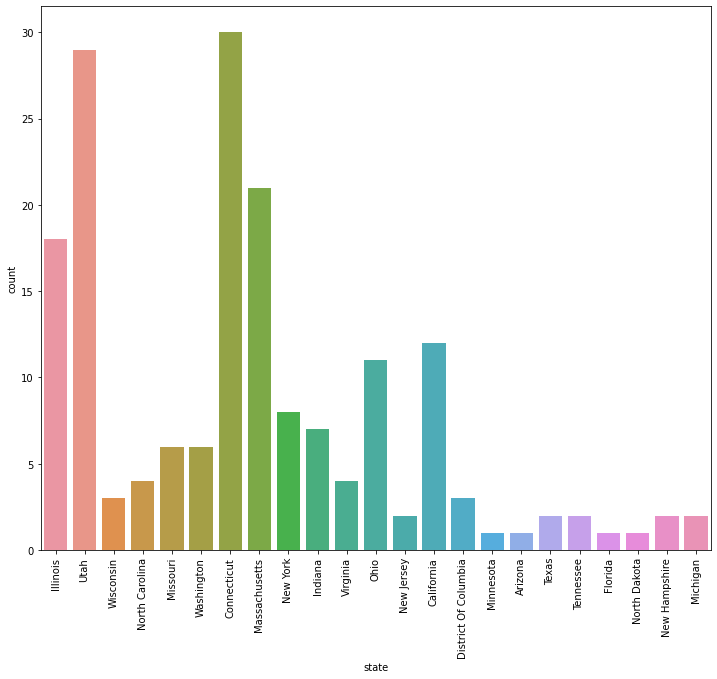

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.countplot(district.state)
plt.xticks(rotation=90)

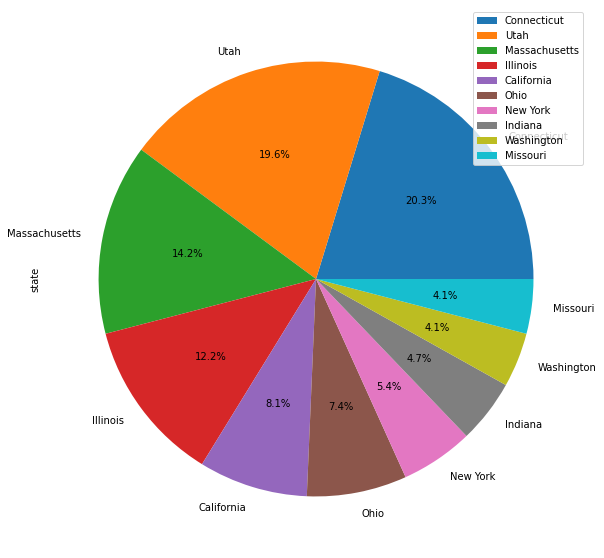

In [15]:
district["state"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3]),
 [Text(0, 0, 'Suburb'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'City'),
  Text(3, 0, 'Town')])

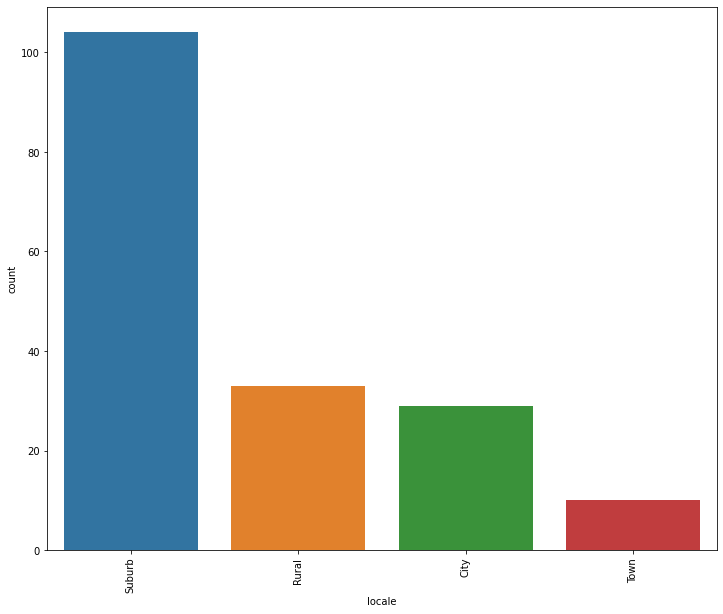

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.countplot(district.locale)
plt.xticks(rotation=90)

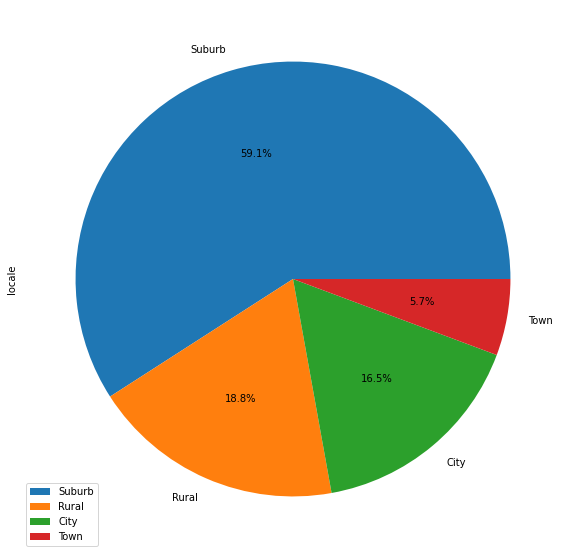

In [12]:
district["locale"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

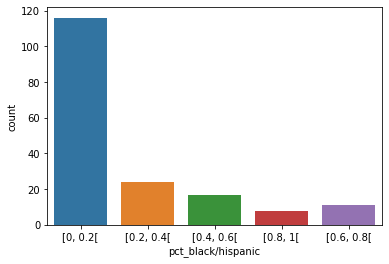

In [13]:
sns.countplot(data= district, x = "pct_black/hispanic")
plt.show()

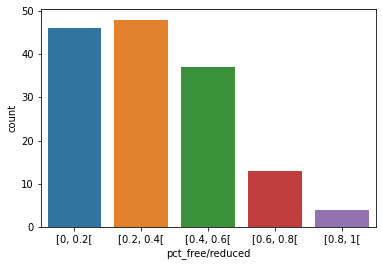

In [14]:
sns.countplot(data= district, x = "pct_free/reduced")
plt.show()

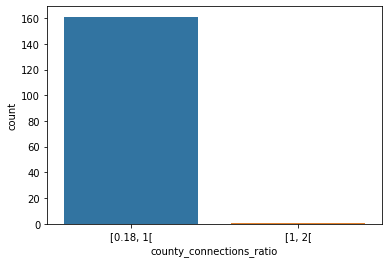

In [15]:
sns.countplot(data= district, x = "county_connections_ratio")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '[14000, 16000['),
  Text(1, 0, '[6000, 8000['),
  Text(2, 0, '[10000, 12000['),
  Text(3, 0, '[8000, 10000['),
  Text(4, 0, '[12000, 14000['),
  Text(5, 0, '[16000, 18000['),
  Text(6, 0, '[20000, 22000['),
  Text(7, 0, '[18000, 20000['),
  Text(8, 0, '[22000, 24000['),
  Text(9, 0, '[4000, 6000['),
  Text(10, 0, '[32000, 34000[')])

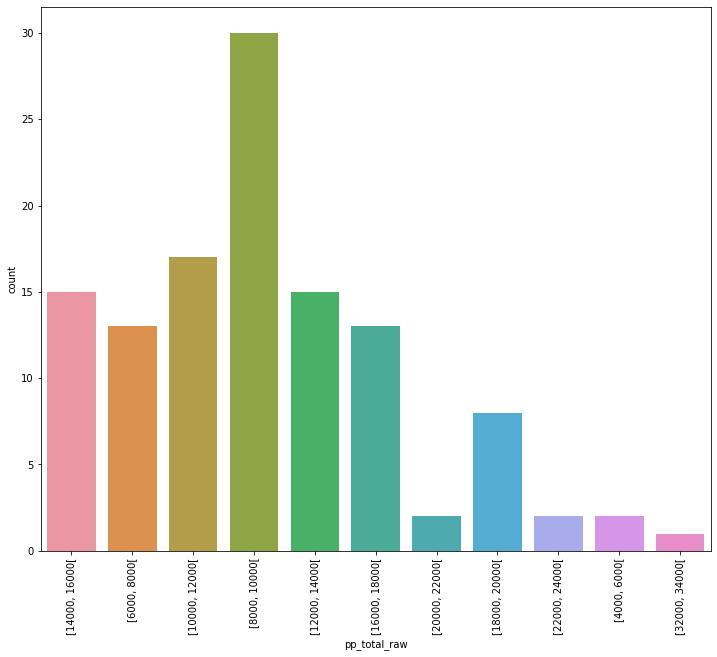

In [16]:
plt.figure(figsize=(12,10))
sns.countplot(district.pp_total_raw)
plt.xticks(rotation=90)

In [19]:
import pandas as pd
import glob

CSV_files=pd.DataFrame()
address = glob.glob('../input/engagement-data/*.csv')
count=0
for i in address:
    with open(i, "rb") as data_of_files:
        data=pd.read_csv(data_of_files)
        CSV_files=pd.concat([CSV_files,data], axis=0)
        count=count+1
        if count==233:
            break  
CSV_files


,time,lp_id,pct_access,engagement_index
0,2020-01-01,92844.0,0.01,0.68
1,2020-01-01,64838.0,0.01,0.68
2,2020-01-01,94058.0,0.00,NaN
3,2020-01-01,26488.0,0.03,26.21
4,2020-01-01,32340.0,0.01,0.11
...,...,...,...,...
41423,2020-12-31,32213.0,1.69,587.06
41424,2020-12-31,23644.0,0.05,0.50
41425,2020-12-31,16164.0,0.05,1.00
41426,2020-12-31,85975.0,0.10,87.56
